# Linear Regression, Ridge, Lasso, ElasticNet

#### Import Libraries

In [146]:
import pandas as pd
import pandas as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [102]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Data Cleaning

In [103]:
df.shape

(246, 14)

In [104]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [105]:
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [106]:
df1 = df.loc[:121]
df2 = df.loc[123:]

In [107]:
df1['Region']=0 # Bejaia Region
df2['Region']=1 # Sidi-Bel Abbes Region

In [108]:
df = pd.concat([df1,df2],axis = 0)
df.shape

(245, 15)

In [109]:
df.loc[119:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [110]:
df.drop(123,inplace = True)

In [111]:
df.loc[119:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [112]:
df.reset_index(inplace = True)

In [113]:
df.loc[119:125]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
125,127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1


In [114]:
df.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [115]:
df[df.isnull().any(axis = 1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [116]:
df['Classes  '] = df['Classes  '].fillna(df['Classes  '].mode()[0])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
 15  Region       244 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 30.6+ KB


In [118]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [119]:
df[['day', 'month', 'year']] = df[['day', 'month', 'year']].astype(int)

In [120]:
# df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
# ValueError: could not convert string to float: '14.6 9'

In [121]:
for col in [' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[col] = df[col].replace('14.6 9','14.69')

In [122]:
# df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
# ValueError: could not convert string to float: 'fire   '

In [123]:
for col in [' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[col] = df[col].replace('fire   ',0)

In [124]:
df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        244 non-null    int64  
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    float64
 5    RH          244 non-null    float64
 6    Ws          244 non-null    float64
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
 15  Region       244 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 30.6+ KB


In [126]:
df.head(2)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [127]:
df["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [128]:
df["Classes  "] = df["Classes  "].map({'not fire   ':0, 'fire   ':1, 'fire':1, 'fire ':1, 'not fire':0, 'not fire ':0, 'not fire     ':0, 'not fire    ':0})

In [129]:
df["Classes  "].unique()

array([0, 1])

In [130]:
df.drop("index", inplace = True, axis = 1)

In [131]:
df.rename(columns={' RH': 'RH'}, inplace = True)
df.rename(columns={' Ws': 'Ws'}, inplace = True)
df.rename(columns={'Rain ': 'Rain'}, inplace = True)
df.rename(columns={'Classes  ': 'Classes'}, inplace = True)

In [132]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [133]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


#### Exploratory Data Analysis (EDA)

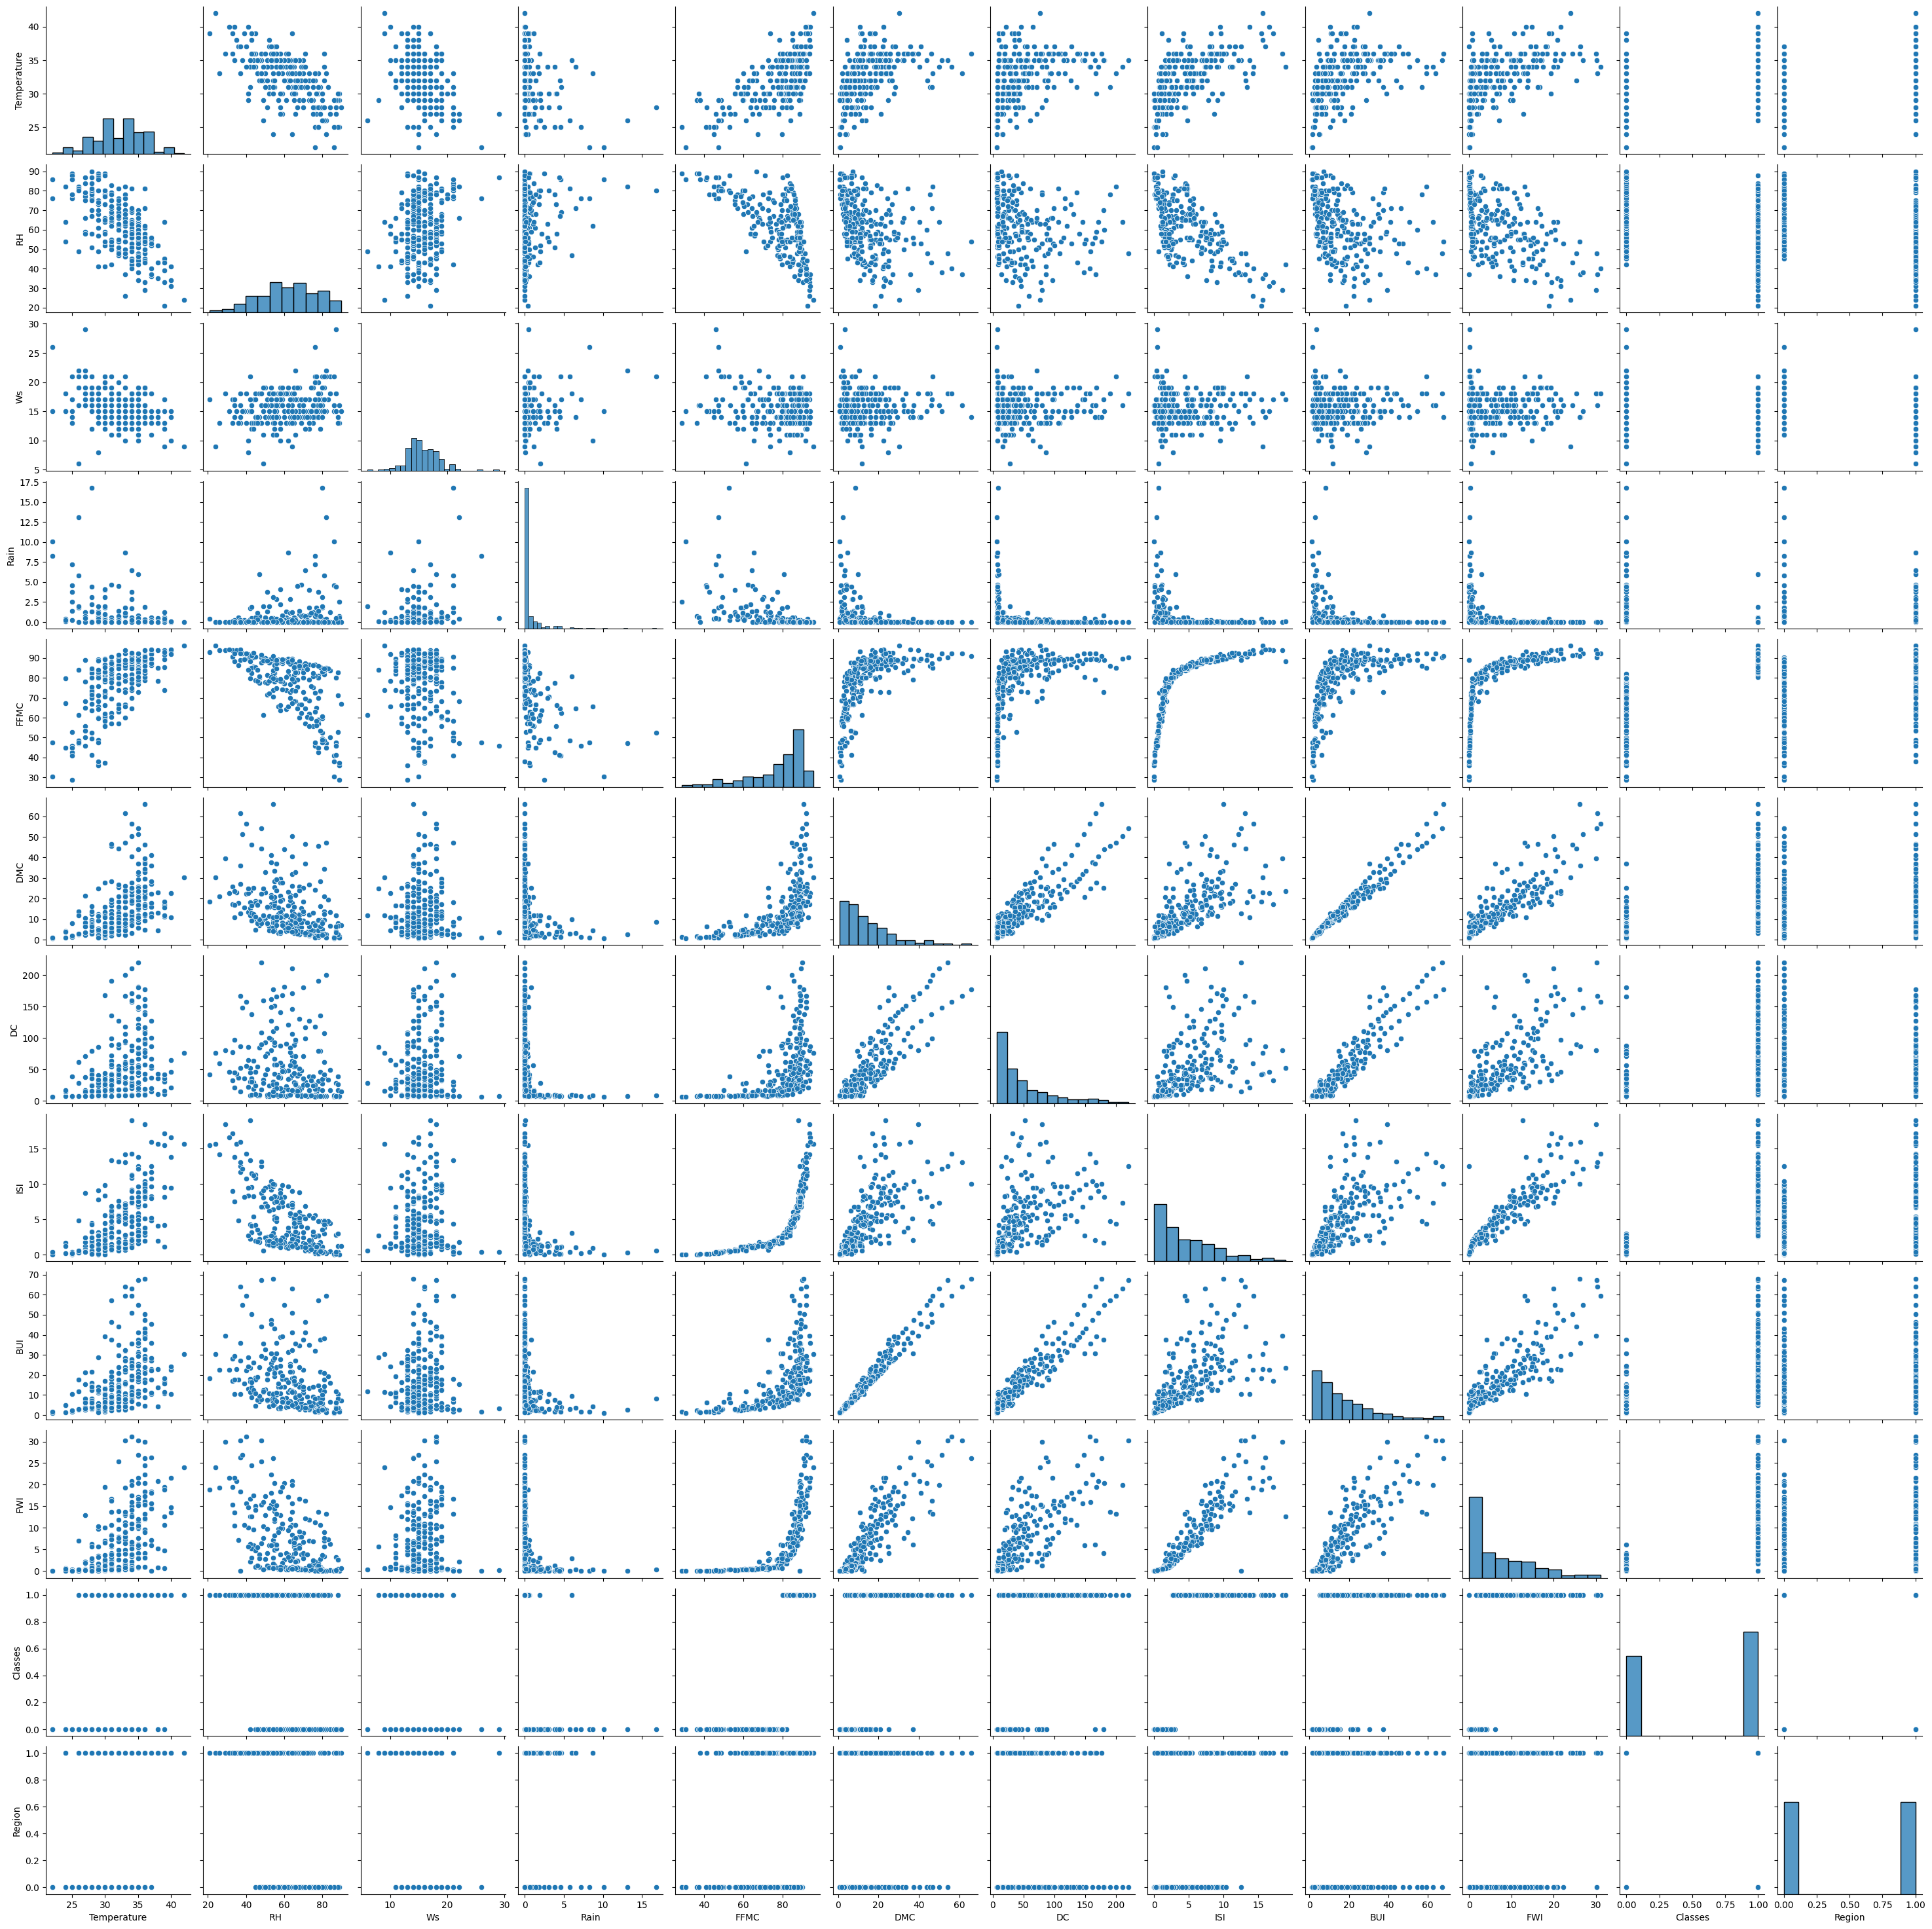

In [159]:
sns.pairplot(df)

In [153]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558393,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.569997,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028799,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322682,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686033,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874778,0.584188,0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740186,0.507132,-0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907461,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857771,0.583882,0.087370
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740186,0.907461,0.857771,1.000000,0.713357,0.192451


<Axes: >

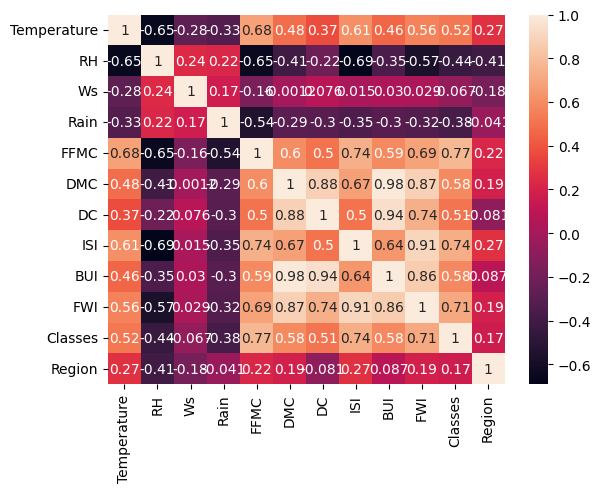

In [155]:
sns.heatmap(df.corr(), annot = True)

In [156]:
percentage = df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.557377
0    43.442623
Name: proportion, dtype: float64

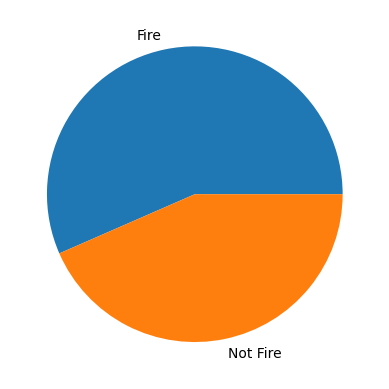

In [158]:
plt.pie(percentage, labels=['Fire','Not Fire'])
plt.show()

#### Train-test split

In [ ]:
df.drop(['day','month','year'], axis = 1, inplace = True)
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [160]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [161]:
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','Region', 'Classes']]
y = df[['FWI']]

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Scaling

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

In [165]:
lin_model.coef_

array([[-0.12669966, -0.17763284, -0.10207542,  0.01257656, -0.77420683,
        -0.49131044, -0.7721581 ,  4.71287427,  5.15943466, -0.14213303,
         0.28122629]])

In [166]:
lin_model.intercept_

array([7.27282051])

#### Performance Matrics of Linear Regression

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score

In [168]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, rmse, r2)

0.49876960935353437 0.5405981528301159 0.7062362277266258 0.9872031475519694


In [170]:
from sklearn.model_selection import cross_val_score
crossval_score = cross_val_score(lin_model, x_train,y_train, cv = 5)
print(crossval_score)

[0.9243951  0.9704706  0.98903981 0.97456684 0.84069241]


# Ridge Regression and Performance Matrics

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, rmse, r2)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv_model = RidgeCV(cv=5)
ridgecv_model.fit(x_train, y_train)
y_pred = ridgecv_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, rmse, r2)
plt.scatter(y_test,y_pred)

# Lasso Regression and Performance Matrics

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, rmse, r2)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LassoCV
lassocv_model = LassoCV(cv=5)
lassocv_model.fit(x_train, y_train)
y_pred = lassocv_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, mae, rmse, r2)
plt.scatter(y_test,y_pred)

# ElasticNet and Performance Matrics

In [ ]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(x_train,y_train)
y_pred=elastic.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic=ElasticNet()
elastic.fit(x_train,y_train)
y_pred=elastic.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)